# EDA Dataset

## Dataset Details

# [Describe Data] !!!

### Features Selection based on Risl Factors Identified from scientific literature

[BRING MORE DETAILS - IMPROVE TEXT]

Being a younger adult, female, widowed, separated or divorced, Caucasian, poor, occasional drinker (vs abstainer), having a family history of mental health problems, having less education and living in areas with a higher unemployment rate, more visible minorities, more cultural community centres and community organisations, were consistently associated with the increased risk of incident major depressive disorder.
People who have gone through adverse life events (unemployment, bereavement, traumatic events) are more likely to develop depression

Depression is closely related to and affected by physical health. Many of the factors that influence depression (such as physical inactivity or harmful use of alcohol) are also known risk factors for diseases such as cardiovascular disease, cancer, diabetes and respiratory diseases. In turn, people with these diseases may also find themselves experiencing depression due to the difficulties associated with managing their condition.
These features are usually identified as risks factors for depression. They will be extrated from the survey to build the dataset, where ii is suitable.
- Age
- Gender
- Marital Status
- Economical Status
- Alcohol comsuption pattern
- Family history of mental disease
- Educational level
- Living area characteristics
- Adverse Life events
- Physical health: physical inactivity
- Other clinical conditions: cardiovascular diseases, cancer, diabetes, respiratory diseases

### Import Libraries

In [461]:
# Import Libraries for Preprocessing
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from skimpy import skim

### Upload Datasets, Feature Selection, Missing Data Handling

#### 1. Demographic Data

In [462]:
# Upload DEMOGRAPHIC DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

df_1 = pd.read_sas('DEMO_L.xpt', format='xport', encoding='latin1')
print(df_1.sample(5))

        SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
8523  138901        12         2         1        69       NaN         4   
1166  131544        12         2         2        27       NaN         4   
10848 141226        12         2         1         9       NaN         4   
2011  132389        12         2         2        70       NaN         3   
11640 142018        12         1         2        57       NaN         3   

       RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHRGND  DMDHRAGZ  DMDHREDZ  \
8523          4         2       NaN  ...       NaN       NaN       NaN   
1166          4         1       NaN  ...       NaN       NaN       NaN   
10848         4         2       112  ...         2         2         2   
2011          3         1       NaN  ...       NaN       NaN       NaN   
11640         3       NaN       NaN  ...       NaN       NaN       NaN   

       DMDHRMAZ  DMDHSEDZ  WTINT2YR  WTMEC2YR  SDMVSTRA  SDMVPSU  INDFMPIR  
8523        NaN      

For DEMO_L it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- RIAGENDR: Gender; 1 - Male | 2 - Female
- RIDAGEYR: Age in years at screening; 0 - 80
- DMDEDUC2: Education level (Adults 20+); 1	- Less than 9th grade | 2 -	9-11th grade (Includes 12th grade with no diploma) | 3 - High school graduate/GED or equivalent | 4 - Some college or AA degree | 5	- College graduate or above | 7 - Refused | 9 - Don't know
- DMDMARTZ: Marital status; 1 - Married/Living with partner | 2 - Widowed/Divorced/Separated | 3 - Never married | 77 - Refused | 99 - Don't know
- DMDHHSIZ: Total number of people in the Household; 1 - 7

In [463]:
# List of columns to keep
columns_demo = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'DMDMARTZ', 'DMDHHSIZ']

# Keep only these columns
df_dem = df_1[columns_demo]

# Inspect the result
print(df_dem.sample(10))

        SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  DMDMARTZ  DMDHHSIZ
1652  132030         1        68         5         1         2
271   130649         2        40         2         1         4
2723  133101         1        45         4         2         3
11591 141969         2        80         3         1         3
0     130378         1        43         5         1         4
11615 141993         2        58         3         1         3
10941 141319         2        24         3         3         5
10498 140876         1        40         4         1         5
3247  133625         2         5       NaN       NaN         5
1745  132123         1        55         1         1         7


Exclusion criteria:
- Age < 18;
- 'Refused' and 'Don't know' answers in variables where they apply to

In [464]:
# Filter out rows where age is less than 18
df_demo = df_dem[df_dem['RIDAGEYR'] >= 18]

In [465]:
# Exclude rows where 'Educational Level' and ' 'Marital Status' are 'refused' or 'don't know';
df_demo = df_demo[~(df_demo['DMDEDUC2'].isin([7, 9]) | df_demo['DMDMARTZ'].isin([77, 99]))]

In [466]:
skim(df_demo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8133   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 6      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA   ┃ NA %  ┃ mean     ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SEQN          │    0 │     0 │   140000 │  3400 │  130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇ │  │
│ │ RIAGENDR      │    0 │     0 │      1.6 │   0.5 │       1 │       1 │       2 │       2 │       2 │ ▇    ▇ │  │
│ │ RIDAGEYR      │    0 │     0 │       52 │    19 │      18 │      36 │      55 │      68 │      80 │ ▅▅▅▆▇▇ │  │
│ │ DMDEDUC2      │  359 │  4.41 │      3.8 │   1.1 │       1 │       3 │       4 │       5 │       5 │ ▁▂ ▅▇▇ │  │
│ │ DMDMARTZ      │  361 │  4.44 │      1.7 │   0.8 │       1 │       1 │       1 │       2 │       3 │ ▇  ▃ ▃ │  │
│ │ DMDHHSIZ      │    0 │     0 │      2.6 │   1.5 │       1 │       2 │       2 │       4 │       7 │ ▅▇▃▃▁▁ │  │
│ └───────────────┴──────┴───────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 2. Depression Data

In [467]:
# Upload HEALTH (DEPRESSION) DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_2 = pd.read_sas('DPQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_2.head())

    SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0 130378     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1 130379       0       0       1       0       0       0       0       0   
2 130380       0       0       1       1       0       0       0       0   
3 130386       0       0       0       0       0       1       0       0   
4 130387       0       0       0       0       0       0       0       0   

   DPQ090  DPQ100  
0     NaN     NaN  
1       0       0  
2       0       0  
3       0       0  
4       0     NaN  


Depression will be identified as the sum of variables DPQ010 to DPQ090 >= 10

This score represent the PHQ-9 tool, used to identify depression where the threshold is 10 or more for moderate to severe depression cases

Once the label for the new variable, those variables will be excluded and will not be part of the final dataset

In [468]:
# Separate the first column (ID)
df_2_ids = df_2.iloc[:, 0]  # Get the first column (ID)

# Filter only values between 0 and 3, and ignore others or NaN for the rest of the columns
valid_values = [0, 1, 2, 3]

# Apply the filter to all columns except the first column
df_2_filtered = df_2.iloc[:, 1:].map(lambda x: x if x in valid_values else pd.NA)

# Reattach the first column (IDs)
df_2_filtered.insert(0, df_2.columns[0], df_2_ids)

# Now sum the valid values for each row, ignoring NaNs
df_2_filtered['score'] = df_2_filtered.iloc[:, 1:].sum(axis=1, skipna=True)

# Classify as 'Depression' (1) if score >= 10, otherwise 'Non-Depression' (0)
df_2_filtered['DEPRE'] = df_2_filtered['score'].apply(lambda x: 1 if x >= 10 else 0)

# Ensure the 'DEPRE' column is explicitly boolean
df_2_filtered['DEPRE'] = df_2_filtered['DEPRE'].astype(bool)

# Final dataframe with ID and depression_status
df_depress = df_2_filtered[['SEQN', 'DEPRE']]

# Inspect the result
print(df_depress.sample(10))

       SEQN  DEPRE
782  131838  False
5799 141262  False
4092 138076  False
1736 133631  False
3503 137008   True
3133 136328  False
4476 138805  False
3310 136642  False
1711 133579  False
2583 135288  False


In [469]:
skim(df_depress)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6337   │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ bool        │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │  130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DEPRE                              │             845 │                          0.13 │       ▇    ▁        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

For df_depress, no missing data

#### 3. Alcohol Use Data

In [470]:
# Upload ALCOHOL USE DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_3 = pd.read_sas('ALQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_3.head())

    SEQN  ALQ111  ALQ121  ALQ130  ALQ142  ALQ270  ALQ280  ALQ151  ALQ170
0 130378     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1 130379       1       2       3       0     NaN     NaN       2     NaN
2 130380       1      10       1       0     NaN     NaN       2     NaN
3 130386       1       4       2      10       0      10       2       0
4 130387       1       0     NaN     NaN     NaN     NaN       2     NaN


For ALQ_L, it will be kept, to keep those related to hazardous alcohol use:
- SEQN (Respondent sequence number): unique participant identifier
- ALQ130: During the past 12 months, on those days that you drank alcoholic beverages, on average, how many drinks did you have? 0 - 15 | 777 - Refused | 999 - Don't know 
- ALQ142: During the past 12 months, about how often did you have {DISPLAY NUMBER} or more drinks of any alcoholic beverage? 0 - Never in the last year | 1 - Every day | 2 - Nearly every day | 3 - 3 to 4 times a week | 4 - 2 times a week | 5 - Once a week | 6 - 2 to 3 times a month | 7 - Once a month | 8 - 7 to 11 times in the last year | 9 - 3 to 6 times in the last year | 10 - 1 to 2 times in the last year | 77 - Refused | 99 - Don't know

To reduce missing values in selected features, values from other variables will be used to replace with appropriate values.

Addionally, 'Refused' and 'Don't know' answers will be excluded

In [471]:
# Replace NaN in ALQ130 where ALQ111 == 2 (never used alcohol)
df_3.loc[(df_3['ALQ111'] == 2) & (df_3['ALQ130'].isna()), 'ALQ130'] = 0

In [472]:
# Replace NaN in ALQ130 where ALQ121 == 0 (never used alcohol last year)
df_3.loc[(df_3['ALQ121'] == 0) & (df_3['ALQ130'].isna()), 'ALQ130'] = 0

In [473]:
# Replace NaN in ALQ142 where ALQ111 == 2 (never used alcohol)
df_3.loc[(df_3['ALQ111'] == 2) & (df_3['ALQ142'].isna()), 'ALQ142'] = 0

In [474]:
# Replace NaN in ALQ142 where ALQ121 == 0 (never used alcohol last year)
df_3.loc[(df_3['ALQ121'] == 0) & (df_3['ALQ142'].isna()), 'ALQ142'] = 0

In [475]:
# Exclude rows where answers for ALQ130 and ALQ142 are 'refused' or 'don't know';
df_3 = df_3[~(df_3['ALQ130'].isin([777, 999]) | df_3['ALQ142'].isin([77, 99]))]

In [476]:
# Recategorize classes in ALQ142
# Define mapping function
def map_alq142(value):
    if value == 0:
        return 0  # Non-Drinker
    elif value in [10, 9, 8, 7, 6]:
        return 1  # Light Drinker
    elif value in [5, 4, 3]:
        return 2  # Moderate Drinker
    elif value in [2, 1]:
        return 3  # Heavy Drinker
    else:
        return np.nan  # Handle unexpected values if necessary

# Apply transformation
df_3['ALQ142'] = df_3['ALQ142'].apply(map_alq142)

Also, Missing data will be handled by data imputation

In [477]:
# Data imputation for ALQ130
imputer_130 = SimpleImputer(strategy='median')  # Options: 'mean', 'median', 'most_frequent', 'constant'
df_3[['ALQ130']] = imputer_130.fit_transform(df_3[['ALQ130']])

In [478]:
# Data imputation for ALQ142
imputer_142 = SimpleImputer(strategy='most_frequent')  # Options: 'mean', 'median', 'most_frequent', 'constant'
df_3[['ALQ142']] = imputer_142.fit_transform(df_3[['ALQ142']])

In [479]:
# List of columns to keep
columns_alc = ['SEQN', 'ALQ130', 'ALQ142']

# Keep only these columns
df_alc = df_3[columns_alc]

# Inspect the result
print(df_alc.sample(10))

       SEQN  ALQ130  ALQ142
2071 134303       0       0
2284 134707       0       0
6093 141824       0       0
2603 135324       3       1
4495 138837       1       1
2621 135366       2       1
5458 140651       2       1
543  131410       1       1
5500 140728       2       1
5954 141540       2       1


In [480]:
skim(df_alc)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6306   │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │  130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇  │  │
│ │ ALQ130        │   0 │     0 │      2.2 │   1.9 │       0 │       1 │       2 │       2 │      15 │   ▇▁▁   │  │
│ │ ALQ142        │   0 │     0 │        1 │  0.47 │       0 │       1 │       1 │       1 │       3 │  ▁ ▇ ▁  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 4. Functioning Data

In [481]:
# Upload FUNCTIONING DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_4 = pd.read_sas('FNQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_4.head())

    SEQN  FNQ021  FNQ041  FNQ050  FNQ060  FNQ080  FNQ160  FNQ100  FNQ110  \
0 130378     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1 130379     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2 130380     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3 130381       1       1       2     NaN       1       1       1       1   
4 130384     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   FNQ120  ...  FNQ460  FNQ470  FNQ480  FNQ490  FNQ510  FNQ520  FNQ530  \
0     NaN  ...       1       1       1       1       5     NaN       5   
1     NaN  ...       1       1       1       1       4       1       5   
2     NaN  ...       1       1       1       1       4       3       4   
3       1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN  ...       1       1       1       1       4       1       4   

   FNQ540  FNDADI  FNDAEDI  
0     NaN       2        2  
1     NaN       2        2  
2       1  

For FNQ_L, it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- FNQ160: {Do you/Does SP} have difficulty with self-care such as feeding or dressing {yourself/himself/herself/SP}? [Would you say {you have/SP has}: no difficulty, some difficulty, a lot of difficulty, or cannot do at all?] 1 - No difficulty | 2 - Some difficulty | 3 - A lot of difficulty | 4 - Cannot do at all | 7 - Refused | 9 - Don't know
- FNDADI: WG-SS Disability Indicator 18+ | 1 - With disabilities | 2 - Without disabilities

Additionally, 'refused' and 'don't know' answers will be excluded

In [482]:
# Exclude rows where answers for FNQ160 are 'refused' or 'don't know';
df_4 = df_4[~(df_4['FNQ160'].isin([7, 9]))]

In [483]:
# List of columns to keep
columns_func = ['SEQN', 'FNQ160', 'FNDADI']

# Keep only these columns
df_func = df_4[columns_func]

# Inspect the result
print(df_func.sample(10))

       SEQN  FNQ160  FNDADI
2365 132981       1     NaN
1809 132378     NaN       2
3461 134185     NaN       2
9657 140908       1     NaN
7698 138789     NaN       2
4671 135506       1     NaN
7979 139084     NaN       2
4555 135380       1     NaN
5469 136370     NaN       2
7396 138459       1     NaN


In [484]:
skim(df_func)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10941  │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA    ┃ NA %   ┃ mean    ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ SEQN          │     0 │      0 │  140000 │  3400 │  130000 │  130000 │  140000 │  140000 │ 140000 │ ▇▇▇▇▇▇ │  │
│ │ FNQ160        │  8155 │  74.54 │     1.1 │  0.27 │       1 │       1 │       1 │       1 │      4 │   ▇    │  │
│ │ FNDADI        │  2798 │  25.57 │     1.8 │  0.39 │       1 │       2 │       2 │       2 │      2 │ ▂    ▇ │  │
│ └───────────────┴───────┴────────┴─────────┴───────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 5. Hospital Utilization and Access to Care Data

In [485]:
# Upload HOSPITAL UTILIZATION DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_5 = pd.read_sas('HUQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_5.head())

    SEQN  HUQ010  HUQ030  HUQ042  HUQ055  HUQ090
0 130378       1       1       1       2       2
1 130379       3       1       1       1       2
2 130380       3       1       1       1       2
3 130381       1       1       1       2       2
4 130382       3       1       1       2     NaN


For HUQ_L, it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- HUQ010: {First/Next} I have some general questions about {your/SP's} health. Would you say {your/SP's} health in general is... | 1 - Excellent | 2 - Very good | 3 - Good | 4 - Fair | 5 - Poor | 7 - Refused | 9 - Don't know

Additionally, 'refused' and 'don't know' answers will be excluded

In [486]:
# Exclude rows where answers for HUQ010 are 'refused' or 'don't know';
df_5 = df_5[~(df_5['HUQ010'].isin([7, 9]))]

In [487]:
# List of columns to keep
columns_hosp_util = ['SEQN', 'HUQ010']

# Keep only these columns
df_hosp_util = df_5[columns_hosp_util]

# Inspect the result
print(df_hosp_util.sample(10))

        SEQN  HUQ010
7867  138245       1
3129  133507       1
1192  131570       1
11231 141609       3
7509  137887       1
10198 140576       3
6004  136382       2
8215  138593       2
8401  138779       1
7303  137681       3


In [488]:
skim(df_hosp_util)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11926  │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │  130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇  │  │
│ │ HUQ010        │   0 │     0 │      2.3 │   1.1 │       1 │       1 │       2 │       3 │       5 │ ▇▇ ▇▃▁  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 6. Income Data

Income data in survey is related to:

- INDFMMPI (Family monthly poverty level index)

The respondent was asked to report total family income, received last month in dollars, for themselves and the other members of their family. This variable is an index for the ratio of reported monthly income to poverty. The Department of Health and Human Services’ (HHS) poverty guidelines were used as the poverty measure to calculate this index. These guidelines are issued annually in the Federal Register, and are used to determine financial eligibility for certain federal programs, such as Head Start, Supplemental Nutrition Assistance Program (SNAP) (formerly Food Stamp Program), Special Supplemental Nutrition Program for Women, Infants, and Children (WIC), and the National School Lunch Program. The variable INDFMMPI was calculated by dividing family income by the poverty guidelines, specific to family size, as well as the appropriate year and state. Values at or above 5.00 were coded as 5.00 or more because of disclosure concerns. The values were not computed if the family income data was missing.

- INDFMMPC (Family monthly poverty level index category)

For respondents who reported their family monthly income in dollar amounts, we calculated their family monthly poverty level index (INDFMMPI) as described above. The index was then grouped into three categories (i.e., INDFMMPI ≤ 1.30, 1.30 < INDFMMPI ≤ 1.85, INDFMMPI >1.85) and reported in this variable. These categories were chosen because they represented commonly used percentages of the poverty guidelines (i.e., 130 percent and 185 percent of the guidelines), by federal programs, in determining eligibility.

When the respondent refused to answer the family monthly income question or did not know the total combined family income, a monthly income screener question was asked (question INQ238) to query whether the monthly family income was below 185% of the HHS poverty guidelines. If the response was positive, a follow-up question (INQ241) was asked to see whether the family’s monthly income was more or less than 130% of the HHS poverty guidelines. For these respondents, answers to INQ238 and INQ241 were used to derive variable INDFMMPC.

In [489]:
# Upload INCOME DATA

# Prevent scientific notation for float numbers
# pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
# df_6 = pd.read_sas('INQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
# print(df_6.head())

INQ_L will not be included, as questions related to income are difficult to retrieve as regular data in communitary level

#### 7. Medical Conditions Data

In [490]:
# Upload MEDICAL CONDITIONS DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_7 = pd.read_sas('MCQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_7.head())

    SEQN  MCQ010  MCQ035  MCQ040  MCQ050  AGQ030  MCQ053  MCQ149  MCQ160A  \
0 130378       2     NaN     NaN     NaN       2       2     NaN        1   
1 130379       2     NaN     NaN     NaN       2       2     NaN        2   
2 130380       2     NaN     NaN     NaN       2       2     NaN        2   
3 130381       2     NaN     NaN     NaN       1       2     NaN      NaN   
4 130382       2     NaN     NaN     NaN       2       2     NaN      NaN   

   MCQ195  ...  MCQ510E  MCQ510F  MCQ550  MCQ560  MCQ220  MCQ230A  MCQ230B  \
0       2  ...      NaN      NaN       2       2       2      NaN      NaN   
1     NaN  ...      NaN      NaN       2       2       1       30      NaN   
2     NaN  ...      NaN      NaN       2       2       2      NaN      NaN   
3     NaN  ...      NaN      NaN     NaN     NaN     NaN      NaN      NaN   
4     NaN  ...      NaN      NaN     NaN     NaN     NaN      NaN      NaN   

   MCQ230C  MCQ230D  OSQ230  
0      NaN      NaN       2  
1      N

For MCQ_L, it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- MCQ010 : Has a doctor or other health professional ever told {you/SP} that {you have/s/he/SP has} asthma (az-ma)? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ053: During the past 3 months, {have you/has SP} been on treatment for anemia (a-nee-me-a), sometimes called "tired blood" or "low blood"? [Include diet, iron pills, iron shots, transfusions as treatment.] 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ160A: Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had arthritis (ar-thry-tis)? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ160B: Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had congestive heart failure? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ160C: Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had coronary (kor-o-nare-ee) heart disease? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ160F: Has a doctor or other health professional ever told {you/SP} that {you/s/he} . . .had a stroke? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ160P: {Have you/Has SP} ever been told by a doctor or other health professional that {you/he/she} . . . had chronic obstructive pulmonary disease or COPD, emphysema, or chronic bronchitis? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
- MCQ220: {Have you/Has SP} ever been told by a doctor or other health professional that {you/s/he} had cancer or a malignancy (ma-lig-nan-see) of any kind? 1- Yes | 2 - No | 7 - Refused | 9 - Don't know

Additionally, 'refused' and 'don't know' answers will be excluded

In [491]:
# Exclude rows where answers for ALQ130 and ALQ142 are 'refused' or 'don't know';
df_7 = df_7[~(df_7['MCQ010'].isin([7, 9]) | df_7['MCQ053'].isin([7, 9]) | df_7['MCQ160A'].isin([7, 9]) | df_7['MCQ160B'].isin([7, 9]) | df_7['MCQ160C'].isin([7, 9]) | df_7['MCQ160F'].isin([7, 9]) | df_7['MCQ160P'].isin([7, 9]) | df_7['MCQ220'].isin([7, 9]))]

In [492]:
for col in df_7:
    if col != 'SEQN':  # Skip the 'SEQN' column
        df_7[col] = df_7[col].replace({1: True, 2: False}).astype(bool)

In [493]:
# List of columns to keep
columns_mc = ['SEQN', 'MCQ010', 'MCQ053', 'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160F', 'MCQ160P', 'MCQ220']

# Keep only these columns
df_mc = df_7[columns_mc]

# Inspect the result
print(df_mc.sample(10))

       SEQN  MCQ010  MCQ053  MCQ160A  MCQ160B  MCQ160C  MCQ160F  MCQ160P  \
4454 134914   False   False    False    False    False    False    False   
834  131220   False   False    False    False    False    False    False   
4745 135208   False   False     True     True     True     True     True   
3362 133799   False   False     True     True    False    False    False   
7671 138182   False   False     True    False     True    False     True   
8848 139369   False   False     True    False    False    False    False   
7575 138085   False   False     True     True     True     True     True   
4168 134620   False   False     True    False    False    False    False   
2928 133352    True   False    False    False    False    False    False   
5655 136135   False   False     True     True     True     True     True   

      MCQ220  
4454   False  
834    False  
4745    True  
3362   False  
7671   False  
8848   False  
7575    True  
4168   False  
2928   False  
5655    True 

In [494]:
skim(df_mc)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11620  │ │ bool        │ 8     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │  130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ MCQ010                             │            1924 │                          0.17 │       ▇    ▂        │  │
│ │ MCQ053                             │             433 │                         0.037 │          ▇          │  │
│ │ MCQ160A                            │            6407 │                          0.55 │       ▇    ▇        │  │
│ │ MCQ160B                            │            4250 │                          0.37 │       ▇    ▅        │  │
│ │ MCQ160C                            │            4321 │                          0.37 │       ▇    ▅        │  │
│ │ MCQ160F                            │            4287 │                          0.37 │       ▇    ▅        │  │
│ │ MCQ160P                            │            4470 │                          0.38 │       ▇    ▅        │  │
│ │ MCQ220                             │            5076 │                          0.44 │       ▇    ▆        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 8. Physical Activity Data

In [495]:
# Upload PHYSICAL ACTIVITY DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_8 = pd.read_sas('PAQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_8.head())

    SEQN  PAD790Q PAD790U  PAD800  PAD810Q PAD810U  PAD820  PAD680
0 130378        3       W      45        3       W      45     360
1 130379        4       W      45        3       W      45     480
2 130380        1       W      20        0             NaN     240
3 130384        0             NaN        0             NaN      60
4 130385        1       D      90        1       W      60     180


For PAQ_L, it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- PAD680: How much time {do you/does SP} usually spend sitting on a typical day? 0 to 1380 | 7777 - Refused | 9999 - Don't know

Additionally, 'refused' and 'don't know' answers will be excluded

In [496]:
# Exclude rows where answers for PAD680 are 'refused' or 'don't know';
df_8 = df_8[~(df_8['PAD680'].isin([7777, 9999]))]

In [497]:
# List of columns to keep
columns_pa = ['SEQN', 'PAD680']

# Keep only these columns
df_pa = df_8[columns_pa]

# Inspect the result
print(df_pa.sample(10))

       SEQN  PAD680
634  131309     480
5369 138261     240
1290 132289     420
1339 132364     720
2748 134453     180
1976 133304     360
1411 132467     300
337  130881     600
5277 138134     180
6314 139659     840


In [498]:
skim(df_pa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8080   │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │   130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇ │  │
│ │ PAD680        │  15 │  0.19 │      360 │   210 │  5.4e-79 │     180 │     300 │     480 │    1400 │  ▅▇▅▂  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴──────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 9. Prescriptions Medications

In [499]:
# Upload PRESCRIPTIONS MEDICATIONS DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_9 = pd.read_sas('RXQ_RX_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_9.head(10))

    SEQN  RXQ033  RXQ050
0 130378       1       1
1 130379       1       1
2 130380       1       1
3 130381       1       2
4 130382       2     NaN
5 130383       2     NaN
6 130384       2     NaN
7 130385       2     NaN
8 130386       2     NaN
9 130387       1       1


RXQ033: In the past 30 days, {have you/has SP} used or taken medication for which a prescription is needed? Include only those products prescribed by a health professional such as a doctor or dentist. {Please remember to include any prescription birth control products that you are taking or using such as pills or patches.} 1- Yes | 2 - No | 7 - Refused | 9 - Don't know
To deal with missing data in RXQ050, those that have 2 (no) in RXQ033 will receive 0 as replace for NaN in RXQ050

In [500]:
# Replace NaN in RXQ050 where RXQ033 == 2
df_9.loc[(df_9['RXQ033'] == 2) & (df_9['RXQ050'].isna()), 'RXQ050'] = 0

For RXQ_RX_L, it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- RXQ050: How many prescription medications {have you/has SP} taken in the past 30 days? Would you say {you have/SP has} taken… 1 to 5 | 7 - Refused | 9 - Don't know

Additionally, 'refused' and 'don't know' answers will be excluded

In [501]:
# Exclude rows where answers for RXQ050 are 'refused' or 'don't know';
df_9 = df_9[~(df_9['RXQ050'].isin([7, 9]))]

In [502]:
# List of columns to keep
columns_pm = ['SEQN', 'RXQ050']

# Keep only these columns
df_pm = df_9[columns_pm]

# Inspect the result
print(df_pm.sample(10))

        SEQN  RXQ050
5581  135959       5
11249 141627       3
5628  136006     NaN
10007 140385       4
879   131257       0
4761  135139       0
2246  132624       0
6141  136519       0
705   131083       5
8956  139334       0


In [503]:
skim(df_pm)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11924  │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │  130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇  │  │
│ │ RXQ050        │  40 │  0.34 │      1.6 │   1.9 │       0 │       0 │       1 │       3 │       5 │ ▇▂▂▁▁▃  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### 10. Sleep Disorders Data

In [504]:
# Upload SLEEP DISORDERS DATA

# Prevent scientific notation for float numbers
pd.set_option('display.float_format', '{:.0f}'.format)

# Load the XPT file
df_10 = pd.read_sas('SLQ_L.xpt', format='xport', encoding='latin1')

# Inspect the dataframe
print(df_10.head())

    SEQN SLQ300 SLQ310  SLD012 SLQ320 SLQ330  SLD013
0 130378  21:30  07:00      10  00:00  09:00       9
1 130379  21:00  06:00       9  21:00  06:00       9
2 130380  00:00  08:00       8  00:00  09:00       9
3 130384  21:30  05:00       8  23:00  07:00       8
4 130385  22:05  06:15       8  22:05  06:15       8


For SLQ_L, it will be kept:
- SEQN (Respondent sequence number): unique participant identifier
- SLD012: Number of hours usually sleep on weekdays or workdays 3 to 13.5 | 2 - less than 3 | 14 - 14 or more
- SLD013: Number of hours usually sleep on weekends or non-workdays 3 to 13.5 | 2 - less than 3 | 14 - 14 or more

In [505]:
# List of columns to keep
columns_sd = ['SEQN', 'SLD012', 'SLD013']

# Keep only these columns
df_sd = df_10[columns_sd]

# Inspect the result
print(df_sd.sample(10))

       SEQN  SLD012  SLD013
7268 140596       6       6
3633 135540       4       8
7488 140892       6       8
1073 131888       8       7
85   130489       8       5
4806 137173       6       6
405  130953       8       8
968  131734       9       9
8177 141837       8       9
1130 131968       8       8


### Merging Datasets

In [506]:
# Merge all the variables in a final dataframe to handle datatype transformation and NaN

# Ensure all DataFrames have the same column as the merge key
dfs = [df_demo, df_depress, df_alc, df_func, df_hosp_util, df_mc, df_pa, df_pm, df_sd]

# Set SEQN as index for each DataFrame to join based on it
dfs = [df.set_index('SEQN') for df in dfs]

# Use pd.concat() to join on SEQN (outer join by default)
df_merged = pd.concat(dfs, axis=1, join='inner').reset_index()

skim(df_merged)

c:\Users\ggrys\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6175   │ │ float64     │ 15    │                                                          │
│ │ Number of columns │ 24     │ │ bool        │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA    ┃ NA %  ┃ mean    ┃ sd    ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ SEQN          │     0 │     0 │  140000 │  3400 │   130000 │  130000 │  140000 │  140000 │ 140000 │ ▇▇▇▇▇▇ │  │
│ │ RIAGENDR      │     0 │     0 │     1.5 │   0.5 │        1 │       1 │       2 │       2 │      2 │ ▇    ▇ │  │
│ │ RIDAGEYR      │     0 │     0 │      52 │    18 │       18 │      36 │      55 │      67 │     80 │ ▅▅▅▅▇▇ │  │
│ │ DMDEDUC2      │   272 │   4.4 │     3.9 │   1.1 │        1 │       3 │       4 │       5 │      5 │ ▁▂ ▅▇▇ │  │
│ │ DMDMARTZ      │   273 │  4.42 │     1.7 │   0.8 │        1 │       1 │       1 │       2 │      3 │ ▇  ▃ ▃ │  │
│ │ DMDHHSIZ      │     0 │     0 │     2.6 │   1.5 │        1 │       2 │       2 │       4 │      7 │ ▅▇▃▃▁▁ │  │
│ │ ALQ130        │     0 │     0 │     2.2 │   1.9 │        0 │       1 │       2 │       2 │     15 │  ▇▁▁   │  │
│ │ ALQ142        │     0 │     0 │       1 │  0.47 │        0 │       1 │       1 │       1 │      3 │ ▁ ▇ ▁  │  │
│ │ FNQ160        │  6175 │   100 │     nan │   nan │      nan │     nan │     nan │     nan │    nan │        │  │
│ │ FNDADI        │     2 │  0.03 │     1.8 │  0.39 │        1 │       2 │       2 │       2 │      2 │ ▂    ▇ │  │
│ │ HUQ010        │     0 │     0 │     2.6 │     1 │        1 │       2 │       3 │       3 │      5 │ ▃▇ ▇▃▁ │  │
│ │ PAD680        │     6 │   0.1 │     370 │   210 │  5.4e-79 │     200 │     300 │     480 │   1400 │  ▅▇▅▂  │  │
│ │ RXQ050        │     8 │  0.13 │     2.2 │     2 │        0 │       0 │       2 │       4 │      5 │ ▇▃▃▂▂▆ │  │
│ │ SLD012        │    52 │  0.84 │     7.7 │   1.6 │        2 │       7 │       8 │     8.5 │     14 │  ▁▇▇▁  │  │
│ │ SLD013        │    51 │  0.83 │     8.3 │   1.7 │        2 │     7.5 │       8 │       9 │     14 │  ▁▃▇▂  │  │
│ └───────────────┴───────┴───────┴─────────┴───────┴──────────┴─────────┴─────────┴─────────┴────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DEPRE                              │             821 │                          0.13 │       ▇    ▁        │  │
│ │ MCQ010                             │            1134 │                          0.18 │       ▇    ▂        │  │
│ │ MCQ053                             │             308

The variable FNQ160 have no valide values; therefore, it will be excluded

All observations with any NaN values will be removed, as they represent a few percentage of all dataset

In [507]:
df_final = df_merged.drop(columns=["FNQ160"]).dropna()

In [508]:
skim(df_final)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5822   │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 23     │ │ bool        │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SEQN          │   0 │     0 │   140000 │  3400 │   130000 │  130000 │  140000 │  140000 │  140000 │ ▇▇▇▇▇▇ │  │
│ │ RIAGENDR      │   0 │     0 │      1.6 │   0.5 │        1 │       1 │       2 │       2 │       2 │ ▆    ▇ │  │
│ │ RIDAGEYR      │   0 │     0 │       54 │    17 │       20 │      39 │      57 │      68 │      80 │ ▃▅▅▅▇▇ │  │
│ │ DMDEDUC2      │   0 │     0 │      3.9 │   1.1 │        1 │       3 │       4 │       5 │       5 │ ▁▂ ▅▇▇ │  │
│ │ DMDMARTZ      │   0 │     0 │      1.7 │   0.8 │        1 │       1 │       1 │       2 │       3 │ ▇  ▃ ▃ │  │
│ │ DMDHHSIZ      │   0 │     0 │      2.6 │   1.5 │        1 │       2 │       2 │       3 │       7 │ ▅▇▃▃▁▁ │  │
│ │ ALQ130        │   0 │     0 │      2.2 │   1.9 │        0 │       1 │       2 │       2 │      15 │  ▇▁▁   │  │
│ │ ALQ142        │   0 │     0 │        1 │  0.46 │        0 │       1 │       1 │       1 │       3 │ ▁ ▇ ▁  │  │
│ │ FNDADI        │   0 │     0 │      1.8 │  0.39 │        1 │       2 │       2 │       2 │       2 │ ▂    ▇ │  │
│ │ HUQ010        │   0 │     0 │      2.6 │     1 │        1 │       2 │       3 │       3 │       5 │ ▃▇ ▇▃▁ │  │
│ │ PAD680        │   0 │     0 │      360 │   210 │  5.4e-79 │     180 │     300 │     480 │    1400 │  ▅▇▅▂  │  │
│ │ RXQ050        │   0 │     0 │      2.3 │     2 │        0 │       0 │       2 │       4 │       5 │ ▇▃▃▃▂▆ │  │
│ │ SLD012        │   0 │     0 │      7.7 │   1.6 │        2 │       7 │       8 │     8.5 │      14 │  ▁▇▇▁  │  │
│ │ SLD013        │   0 │     0 │      8.3 │   1.7 │        2 │     7.5 │       8 │       9 │      14 │  ▁▃▇▂  │  │
│ └───────────────┴─────┴───────┴──────────┴───────┴──────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DEPRE                              │             729 │                          0.13 │       ▇    ▁        │  │
│ │ MCQ010                             │            1057 │                          0.18 │       ▇    ▂        │  │
│ │ MCQ053                             │             295 │                         0.051 │          ▇          │  │
│ │ MCQ160A                            │            1944

### Datatypes transformation

In [509]:
# Initialize mapping dictionaries
type_mapping = {}

pd.set_option('future.no_silent_downcasting', True)

# Define ordered categories mapping
ordered_categories_mapping = {
    'DMDEDUC2': [1, 2, 3, 4, 5],
    'HUQ010': [5, 4, 3, 2, 1], 
    'ALQ142': [0, 1, 2, 3]
}

# Explicitly define exceptions for handling column types
force_numeric = ['DMDHHSIZ']
#force_categorical = ['ALQ142']

# Automatically detect types based on conditions
for col in df_final.columns:
    unique_values = df_final[col].dropna().unique()
    
    # Force certain columns as numeric
    if col in force_numeric:
        type_mapping[col] = 'float' if df_final[col].dtype == 'float64' else 'integer'
    
    # Force certain columns as categorical
    #elif col in force_categorical:
    #    type_mapping[col] = 'category'
    
    # Check for true binary variables (like Yes/No)
    elif set(unique_values) == {1, 2} and col not in ['RIAGENDR']:
        type_mapping[col] = 'boolean'
    # Handle ordered categories if defined
    elif col in ordered_categories_mapping:
        type_mapping[col] = pd.CategoricalDtype(ordered=True, categories=ordered_categories_mapping[col])
    # Categorical: more than two distinct values or explicitly defined cases like gender
    elif df_final[col].dtype == 'float64' and len(unique_values) < 5:
        type_mapping[col] = 'category'
    # Numerical: Keep as float or integer
    elif df_final[col].dtype == 'float64':
        type_mapping[col] = 'float'
    elif df_final[col].dtype == 'int64':
        type_mapping[col] = 'integer'

# Apply datatype transformation
for col, dtype in type_mapping.items():
    if dtype == 'boolean':
        df_final[col] = df_final[col].replace({1: True, 2: False}).infer_objects(copy=False)  # Ensures proper downcasting
    elif isinstance(dtype, pd.CategoricalDtype):  # Ordered categories
        df_final[col] = df_final[col].astype(dtype)
    elif dtype == 'category':
        df_final[col] = df_final[col].astype('category')
    elif dtype == 'integer':
        df_final[col] = df_final[col].astype(int)
    elif dtype == 'float':
        df_final[col] = df_final[col].astype(float)

df_final.dtypes

SEQN         float64
RIAGENDR    category
RIDAGEYR     float64
DMDEDUC2    category
DMDMARTZ    category
DMDHHSIZ     float64
DEPRE           bool
ALQ130       float64
ALQ142      category
FNDADI          bool
HUQ010      category
MCQ010          bool
MCQ053          bool
MCQ160A         bool
MCQ160B         bool
MCQ160C         bool
MCQ160F         bool
MCQ160P         bool
MCQ220          bool
PAD680       float64
RXQ050       float64
SLD012       float64
SLD013       float64
dtype: object

In [510]:
## Hot-encoding the categorical variables without meaningful ordering

df_final = pd.get_dummies(df_final, columns=['RIAGENDR', 'DMDMARTZ'], drop_first=True)

In [511]:
# Drop SEQN as it will not be included as a feature
df_final.drop('SEQN', axis=1, inplace=True)

In [512]:
skim(df_final)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 5822   │ │ bool        │ 13    │ │ DMDEDUC2              │                                │
│ │ Number of columns │ 23     │ │ float64     │ 7     │ │ ALQ142                │                                │
│ └───────────────────┴────────┘ │ category    │ 3     │ │ HUQ010                │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean   ┃ sd    ┃ p0         ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR         │    0 │       0 │     54 │    17 │         20 │    39 │    57 │    68 │     80 │ ▃▅▅▅▇▇  │  │
│ │ DMDHHSIZ         │    0 │       0 │    2.6 │   1.5 │          1 │     2 │     2 │     3 │      7 │ ▅▇▃▃▁▁  │  │
│ │ ALQ130           │    0 │       0 │    2.2 │   1.9 │          0 │     1 │     2 │     2 │     15 │   ▇▁▁   │  │
│ │ PAD680           │    0 │       0 │    360 │   210 │    5.4e-79 │   180 │   300 │   480 │   1400 │  ▅▇▅▂   │  │
│ │ RXQ050           │    0 │       0 │    2.3 │     2 │          0 │     0 │     2 │     4 │      5 │ ▇▃▃▃▂▆  │  │
│ │ SLD012           │    0 │       0 │    7.7 │   1.6 │          2 │     7 │     8 │   8.5 │     14 │   ▁▇▇▁  │  │
│ │ SLD013           │    0 │       0 │    8.3 │   1.7 │          2 │   7.5 │     8 │     9 │     14 │   ▁▃▇▂  │  │
│ └──────────────────┴──────┴─────────┴────────┴───────┴────────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DMDEDUC2                         │         0 │              0 │ True                  │                  5 │  │
│ │ ALQ142                           │         0 │              0 │ True                  │                  4 │  │
│ │ HUQ010                           │         0 │              0 │ True                  │                  5 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true            ┃ true rate                   ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DEPRE                                │             729 │                        0.13 │       ▇    ▁        │  │
│ │ FNDADI                               │            10

### Preparing Data for Machine Learning

#### Features and Target Variable

Target Variable: DEPRE - Depression Status (True/False)

Feature Variables:
1. RIDAGEYR: Age in years
2. RIAGENDR: biological sex (male/female)
3. DMDMARTZ: marital status
4. DMDHHSIZ: People living in the same house
5. DMDEDUC2: Educational level
6. HUQ010: Self reported health status (Excelent, Very Good, Good, Fair, Poor)
7. FNDADI: with/without disabilities
8. ALQ130: alcohol doses in a usual drinking day
9. ALQ142: how often drink 4/5 alcohol doses in the last year
10. PAD680: minutes/day of spend sitting (desconsidering sleep time) (sedentarism)
11. RXQ050: prescribed medications/day
12. SLD012: sleeping hours on weekdays
13. SLD013: sleeping hours on weekends
- Clinical conditions - self reported (True/False):
    14. MCQ010: Asthma
    15. MCQ053: Anemia treatment in the last 3 months
    16. MCQ160A: Arthritis
    17. MCQ160B: Congestive heart failure
    18. MCQ160C: Coronary heart disease
    19. MCQ160F: Stroke
    20. MCQ160P: COPD/Emphisema (Chronic Lung Disease)
    21. MCQ220: Cancer

In [513]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Define target variable
target = 'DEPRE'
X = df_final.drop(columns=[target]).copy()  # Copy to avoid modifying original df
y = df_final[target]

# Identify categorical and boolean features
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = X.select_dtypes(include=['bool']).columns.tolist()

# Convert boolean columns to integers (0/1)
X[bool_cols] = X[bool_cols].astype(int)

# Convert categorical columns using Label Encoding
X[cat_cols] = X[cat_cols].apply(LabelEncoder().fit_transform)

# Apply Chi-Square test (only categorical & boolean features)
chi2_scores, p_values = chi2(X[cat_cols + bool_cols], y)

# Store results in a DataFrame with higher precision
chi2_results = pd.DataFrame({
    'Feature': cat_cols + bool_cols,
    'Chi2 Score': np.round(chi2_scores,4),
    'p-value': np.round(p_values, 4)  # Increase decimal precision
})

# Sort results by Chi2 Score
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Print results with better formatting
pd.set_option('display.float_format', '{:.3f}'.format)  # Ensure better number display
print("Chi-Square Test Results:")
print(chi2_results)

Chi-Square Test Results:
         Feature  Chi2 Score  p-value
3         FNDADI     268.155    0.000
2         HUQ010     181.764    0.000
14  DMDMARTZ_3.0      58.787    0.000
10       MCQ160P      54.917    0.000
4         MCQ010      41.897    0.000
6        MCQ160A      16.117    0.000
5         MCQ053      10.096    0.002
0       DMDEDUC2       9.669    0.002
7        MCQ160B       8.611    0.003
9        MCQ160F       7.722    0.005
12  RIAGENDR_2.0       7.301    0.007
13  DMDMARTZ_2.0       5.867    0.015
11        MCQ220       3.640    0.056
1         ALQ142       1.701    0.192
8        MCQ160C       0.026    0.871


### Correlation Anlaysis

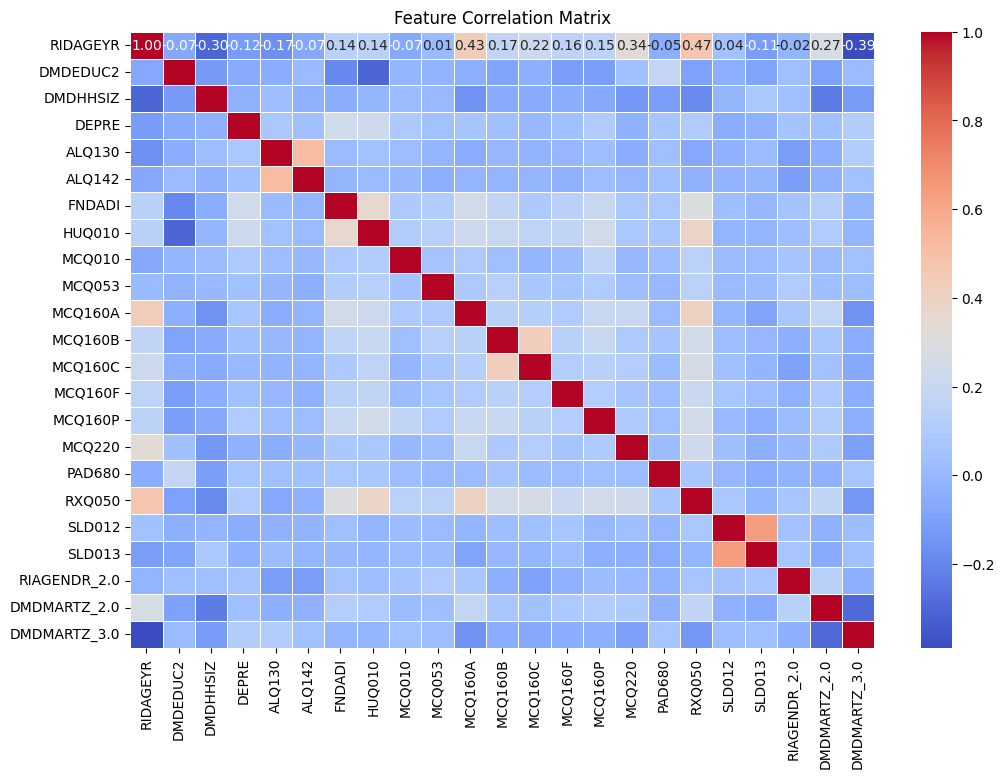

Highly Correlated Features (corr > 0.5):
SLD013  SLD012   0.640
SLD012  SLD013   0.640
ALQ130  ALQ142   0.521
ALQ142  ALQ130   0.521
dtype: float64


In [521]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_final.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Find highly correlated features
threshold = 0.5
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1.0)]

print("Highly Correlated Features (corr > 0.5):")
print(high_corr_pairs)

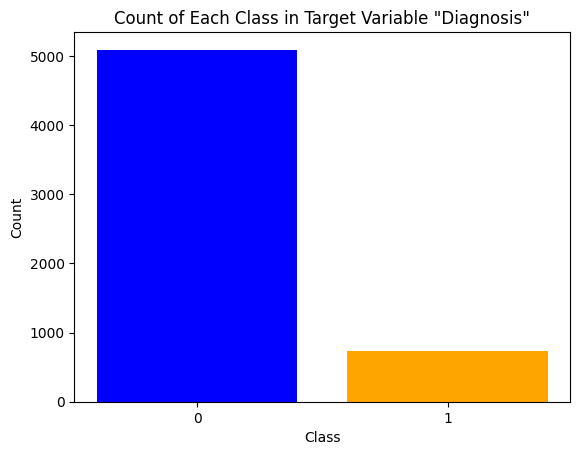

Class 0: Count = 5093, Proportion = 0.8748
Class 1: Count = 729, Proportion = 0.1252


In [515]:
ml_target = df_final["DEPRE"].values

# Count the occurrences of each class label
unique_classes, class_counts = np.unique(ml_target, return_counts=True)

custom_colors = ['blue', 'orange'] 

# Plot the bar chart
plt.bar(unique_classes, class_counts, color = custom_colors)

# Add title and labels
plt.title('Count of Each Class in Target Variable "Diagnosis"')
plt.xlabel('Class')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

# Count the occurrences of each class
class_counts = np.bincount(ml_target)

# Calculate the proportions of each class
total_instances = len(ml_target)
class_proportions = class_counts / total_instances

# Print the counts and proportions
for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
    print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

Class Imbalance Techniques

1. Resampling Techniques

Oversampling the minority class (Class 1): You can use methods like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples of the minority class to balance the classes.

Undersampling the majority class (Class 0): This involves randomly removing some of the samples from the majority class to balance the class distribution.

Combination of both (SMOTE + Tomek Links): You can combine oversampling with Tomek Links (a method to remove noisy examples from the majority class).

2. Class Weight Adjustment

Many machine learning algorithms, like Logistic Regression, Random Forest, and SVM, allow you to adjust class weights. By assigning a higher weight to the minority class, the algorithm will penalize mistakes made on the minority class more heavily, helping the model focus on predicting that class.

3. Change Evaluation Metrics

Accuracy is not a good metric for imbalanced data because it can be misleading. Instead, focus on metrics like:
Precision, Recall, F1-Score: These metrics give you a better understanding of how well your model is handling the minority class.
ROC-AUC: Measures the overall performance, taking both classes into account.

4. Ensemble Methods

Algorithms like Random Forests and XGBoost can sometimes handle class imbalance well. Balanced Random Forest and EasyEnsemble are ensemble methods that specifically address class imbalance.

5. Anomaly Detection Models

When one class is very small compared to the other, you can treat the problem as anomaly detection rather than a traditional classification problem.

6. Threshold Moving

Instead of using the default decision threshold of 0.5, you can adjust the decision threshold to be more sensitive to the minority class.

In [516]:
import json

dtypes_dict = {}

for col in df_final.columns:
    if df_final[col].dtype == "bool":
        dtypes_dict[col] = "boolean"
    elif isinstance(df_final[col].dtype, pd.CategoricalDtype):  # Updated to avoid deprecated warning
        dtypes_dict[col] = {
            "dtype": "category",
            "categories": list(df_final[col].cat.categories),  # Store category levels
            "ordered": df_final[col].cat.ordered  # Store ordering flag
        }
    else:
        dtypes_dict[col] = str(df_final[col].dtype)  # Save other dtypes normally

# Save as JSON
with open("dtypes_dict.json", "w") as file:
    json.dump(dtypes_dict, file)

In [517]:
# Creating the ML dataset
df_final.to_csv("./df_ml.csv", index=False)